In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import xarray as xr
import glob
import os
from dask.diagnostics import ProgressBar
import gfdl_utils as gu

In [12]:
pathDict = {'pp':('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp'),
           'ppname':'ocean_cobalt_omip_2d',
           'out':'ts',
           'local':'annual/5yr',
           'time':'*',
           'add':'fgco2',
           }

In [13]:
path,paths = gu.core.get_pathspp(**pathDict,get_static=False)

In [22]:
gridpath = gu.core.get_pathstatic(pathDict['pp'],pathDict['ppname'])

In [23]:
ds = gu.core.open_frompp(**pathDict,get_static=False)
grid = xr.open_dataset(gridpath)

In [25]:
ds.data_vars

Data variables:
    fgco2       (time, yh, xh) float32 dask.array<chunksize=(5, 576, 720), meta=np.ndarray>
    time_bnds   (time, nv) object dask.array<chunksize=(5, 2), meta=np.ndarray>
    average_T1  (time) object dask.array<chunksize=(5,), meta=np.ndarray>
    average_T2  (time) object dask.array<chunksize=(5,), meta=np.ndarray>
    average_DT  (time) timedelta64[ns] dask.array<chunksize=(5,), meta=np.ndarray>

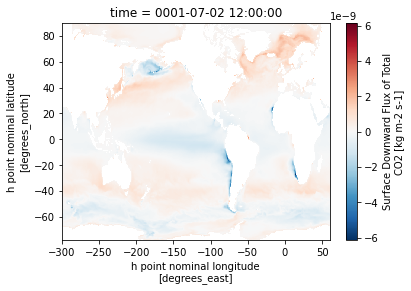

In [18]:
ds['fgco2'].isel(time=0).plot()